# Project Overview

## Background

The expert acknowledge that the current marketing used by QuickU is the same across different segments. The treatment is the same across all users. However, the experts believe that they're missing an opportunity to maximize their customers. The expert would like to conduct different approaches in different segments using customer segmentation analysis. The expert would like to know the characteristic of each segment and utilize their behaviour to improve performance.


*Note: This project is the continuation from previous project. Please refer to this link for more context:*

[*QuickU Deck*](https://docs.google.com/presentation/d/1Seqdk-Um6bXM2OxX69FsJRIPQ45VCTykC-E2lroERsI/edit?usp=sharing)

[*QuickU Dashboard*](https://public.tableau.com/views/QuickCommerce-QuickU/DBGMV?:language=en-US&:display_count=n&:origin=viz_share_link)

## Objective

Determine the most effective and efficient marketing strategy with 8% increase in the number of complete orders during Q2 in 2023 from total number of complete orders of the previous year based on result of customer segmentation analysis.


## Root Cause Analysis

The lack of marketing strategy generate the decline of GMV in 2022 by around 4%.


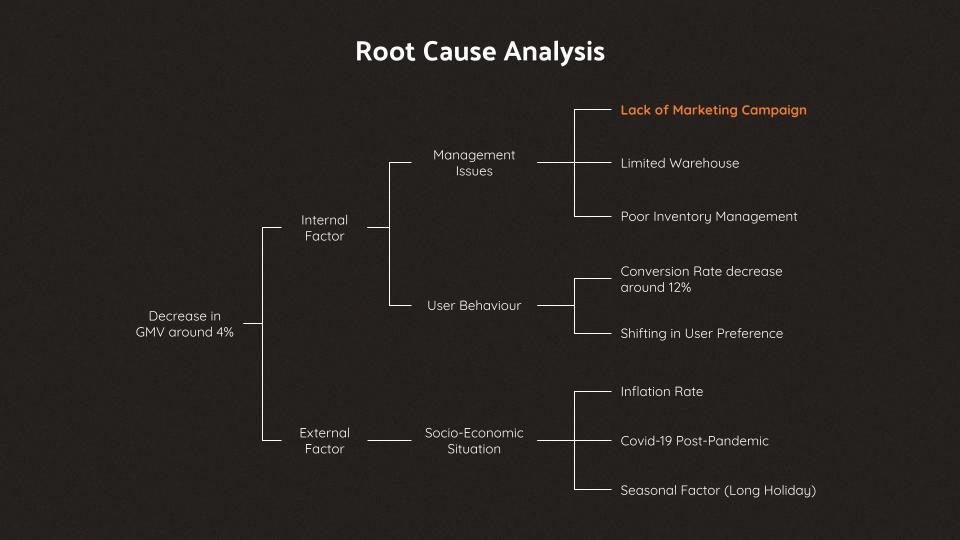

# Initial Process

In [ ]:
# Import necessary libararies and packages
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.offline as pyo
import plotly.graph_objs as go
import seaborn as sns
import datetime as dt

# CLUSTER
from sklearn.cluster import KMeans                                             # to perform the k-means algorithm
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler   # to sacalling different attribute
from sklearn.preprocessing import PowerTransformer                             # to sacalling
from sklearn.preprocessing import FunctionTransformer                          # to sacalling
from sklearn import cluster                                                    # for machine learning and statistical modelling (we use it for clustering)

import matplotlib.cm as cm                                                     # provide a large set of colormaps(cm)
from sklearn.metrics import silhouette_samples, silhouette_score               # for perform silhoutte analysis
from sklearn.datasets import make_blobs                                        # Generate isotropic Gaussian blobs for clustering

from sklearn import cluster
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)
pd.options.display.float_format = '{:,.2f}'.format

layout = go.Layout(paper_bgcolor='white',\
                   plot_bgcolor='white')
fig = go.Figure(layout=layout)
templated_fig = pio.to_templated(fig)
pio.templates['my_template'] = templated_fig.layout.template
pio.templates.default = 'my_template'

In [ ]:
#Mounting Gdrive
from google.colab import drive
drive.mount('/content/drive')

# Import dataset
prefix_path = '/content/drive/MyDrive/04. Dataset/QuickU/'

df_userinit = pd.read_csv(prefix_path+'users.csv')
df_transinit = pd.read_csv(prefix_path+'transactions.csv')
df_visitinit = pd.read_csv(prefix_path+'visits.csv') #N
df_tranitinit = pd.read_csv(prefix_path+'transaction_item.csv') #N
df_pminit = pd.read_csv(prefix_path+'payment_method.csv') #N

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_userinit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818375 entries, 0 to 818374
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        818375 non-null  int64 
 1   register_date  818375 non-null  object
 2   age            818375 non-null  int64 
 3   location       818375 non-null  object
 4   sessions_id    818375 non-null  int64 
 5   event_id       818375 non-null  int64 
 6   event          818375 non-null  object
 7   timestamp      818375 non-null  object
dtypes: int64(4), object(4)
memory usage: 49.9+ MB


In [ ]:
df_userinit.head(5)

,user_id,register_date,age,location,sessions_id,event_id,event,timestamp
0,1,2019-11-30 08:19:20 UTC,15,Pusat,1,1,homepage,2019-12-01 02:04:56 UTC
1,1,2019-11-30 08:19:20 UTC,15,Pusat,1,2,productview,2019-12-01 02:05:04 UTC
2,1,2019-11-30 08:19:20 UTC,15,Pusat,1,3,viewcart,2019-12-01 02:10:45 UTC
3,2,2019-11-29 21:26:01 UTC,38,Timur,2,4,homepage,2019-12-01 02:42:49 UTC
4,2,2019-11-29 21:26:01 UTC,38,Timur,2,5,productview,2019-12-01 02:42:50 UTC


In [ ]:
df_transinit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37741 entries, 0 to 37740
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   sessions_id              37741 non-null  int64 
 1   user_id                  37741 non-null  int64 
 2   transactions_id          37741 non-null  int64 
 3   payment_method_id        37741 non-null  int64 
 4   total_amount             37741 non-null  int64 
 5   transactions_timestamps  37741 non-null  object
 6   status                   37741 non-null  object
dtypes: int64(5), object(2)
memory usage: 2.0+ MB


In [ ]:
df_transinit.head(5)

,sessions_id,user_id,transactions_id,payment_method_id,total_amount,transactions_timestamps,status
0,33118,2030,6570,1,288000,2020-12-26 10:33:37 UTC,completed
1,43057,66,9115,1,288000,2021-02-13 06:32:34 UTC,completed
2,144311,8697,28750,1,288000,2022-03-27 15:15:17 UTC,canceled
3,202309,7948,36448,1,288000,2022-11-20 23:30:38 UTC,completed
4,27850,3540,5599,1,224000,2020-11-18 01:39:36 UTC,completed


In [ ]:
df_visitinit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192524 entries, 0 to 192523
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   sessions_id        192524 non-null  int64 
 1   user_id            192524 non-null  int64 
 2   visits_timestamps  192524 non-null  object
 3   traffic_medium     192524 non-null  object
 4   traffic_source     192524 non-null  object
 5   traffic_name       88041 non-null   object
dtypes: int64(2), object(4)
memory usage: 8.8+ MB


In [ ]:
df_visitinit.head(5)

,sessions_id,user_id,visits_timestamps,traffic_medium,traffic_source,traffic_name
0,131765,6288,2022-02-28 00:47:36 UTC,Direct,Direct,NaN
1,131773,495,2022-02-28 01:49:24 UTC,Direct,Direct,NaN
2,131776,4518,2022-02-28 01:58:22 UTC,Direct,Direct,NaN
3,131789,5570,2022-02-28 04:02:07 UTC,Direct,Direct,NaN
4,131794,3339,2022-02-28 04:11:11 UTC,Direct,Direct,NaN


In [ ]:
df_tranitinit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107664 entries, 0 to 107663
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   transactions_id       107664 non-null  int64 
 1   transaction_items_id  107664 non-null  int64 
 2   product_id            107664 non-null  int64 
 3   product_qty           107664 non-null  int64 
 4   product_price         107664 non-null  int64 
 5   product_amount        107664 non-null  int64 
 6   product_category      107664 non-null  object
 7   product_name          107664 non-null  object
dtypes: int64(6), object(2)
memory usage: 6.6+ MB


In [ ]:
df_tranitinit.head(5)

,transactions_id,transaction_items_id,product_id,product_qty,product_price,product_amount,product_category,product_name
0,1,1,71,1,30000,30000,Unggas,Unggas B
1,1,2,65,1,15000,15000,"Susu, Roti, dan Olahannya","Susu, Roti, dan Olahannya B"
2,1,3,3,2,13000,26000,Bumbu Dapur,Bumbu Dapur C
3,1,4,7,1,40000,40000,Daging Beku,Daging Beku A
4,1,5,18,1,100000,100000,Kebutuhan Pokok,Kebutuhan Pokok F


In [ ]:
df_pminit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   payment_method     5 non-null      object
 1   payment_method_id  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [ ]:
df_pminit.head(5)

,payment_method,payment_method_id
0,Kartu Debit,1
1,Kartu Kredit,2
2,QRIS,3
3,Transfer Rekening,4
4,Virtual Account,5


## Preprocessing Data

### Date Feature

In [ ]:
import pytz

# Assign current period
NOW = dt.datetime(2023, 1, 1, tzinfo=pytz.UTC)

In [ ]:
df_trans2 = df_transinit.copy()

# Rename columns
df_trans2.rename(columns={'transactions_timestamps':'trans_date'}, inplace=True)

# Complete transaction only!
df_trans2 = df_trans2[df_trans2['status'] == 'completed']

# Data modified into datetime data type
df_trans2['trans_date'] = pd.to_datetime(df_trans2['trans_date'])

df_trans2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26247 entries, 0 to 37740
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   sessions_id        26247 non-null  int64              
 1   user_id            26247 non-null  int64              
 2   transactions_id    26247 non-null  int64              
 3   payment_method_id  26247 non-null  int64              
 4   total_amount       26247 non-null  int64              
 5   trans_date         26247 non-null  datetime64[ns, UTC]
 6   status             26247 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(5), object(1)
memory usage: 1.6+ MB


In [ ]:
df_trans2['trans_date'].min()

Timestamp('2019-12-01 08:41:56+0000', tz='UTC')

In [ ]:
# Calculate the average number of transactions per unique transaction
df_trans2.shape[0]/df_trans2['transactions_id'].value_counts().count()

1.0

# Segmentation (RFM)

In [ ]:
# Assign custom aggregation
custom_agg = {}
custom_agg['trans_date'] = lambda x:x.iloc[0] #Collect first data
custom_agg['transactions_id'] = lambda x:x.iloc[0] #Collect first data
custom_agg['total_amount'] = 'sum'

df_qurfm = df_trans2.groupby(['user_id','sessions_id']).agg(custom_agg)

In [ ]:
#Calculate different of recent date with last day of transaction
df_qurfm['Recency'] = NOW - df_qurfm['trans_date']
df_qurfm['Recency'] = pd.to_timedelta(df_qurfm['Recency']).astype('timedelta64[D]')
df_qurfm.reset_index(inplace=True)

df_qurfm.head(5)

,user_id,sessions_id,trans_date,transactions_id,total_amount,Recency
0,1,115,2019-12-17 07:32:06+00:00,18,68000,"1,110.00"
1,1,9867,2020-06-07 15:24:16+00:00,2090,48000,937.00
2,2,54913,2021-04-04 18:06:14+00:00,12194,63000,636.00
3,2,98633,2021-12-04 11:13:44+00:00,19156,60000,392.00
4,3,18,2019-12-02 02:47:54+00:00,3,111000,"1,125.00"


In [ ]:
# Assign custom aggregation
custom_agg = {}
custom_agg["Recency"] = ["min"] #Calculate minimum value of Recency
custom_agg["trans_date"] = lambda x: len(x) #Calculate purchase frequency
custom_agg["total_amount"] = "sum"

# Create new dataframe as base final RFM table
df_qurfmfin = df_qurfm.groupby('user_id').agg(custom_agg)
df_qurfmfin.head(5)

,Recency,trans_date,total_amount
,min,<lambda>,sum
user_id,,,
1,937.00,2,116000
2,392.00,2,123000
3,"1,105.00",2,136500
4,465.00,2,72000
5,917.00,4,222000


In [ ]:
#transpose column
df_qurfmfin.columns = ["recency", "frequency", "monetary_value"]
df_qurfmfin.reset_index(inplace=True)

df_qurfmfin.head(5)

,user_id,recency,frequency,monetary_value
0,1,937.00,2,116000
1,2,392.00,2,123000
2,3,"1,105.00",2,136500
3,4,465.00,2,72000
4,5,917.00,4,222000


## K-Means

In [ ]:
# Create dateframe to model preparation
df_qutrans = df_trans2.merge(df_qurfmfin, how='left', on='user_id')
df_qutrans.head(5)

,sessions_id,user_id,transactions_id,payment_method_id,total_amount,trans_date,status,recency,frequency,monetary_value
0,33118,2030,6570,1,288000,2020-12-26 10:33:37+00:00,completed,460.00,7,1578000
1,43057,66,9115,1,288000,2021-02-13 06:32:34+00:00,completed,309.00,11,2314000
2,202309,7948,36448,1,288000,2022-11-20 23:30:38+00:00,completed,3.00,5,1083000
3,27850,3540,5599,1,224000,2020-11-18 01:39:36+00:00,completed,129.00,7,1434000
4,69759,1023,15127,1,224000,2021-07-29 17:44:36+00:00,completed,22.00,9,1736000


In [ ]:
# scalimg the data using Minmax Scaler
mm_df_kmeans = df_qurfmfin.copy()
mm_df_kmeans[['recency', 'frequency', 'monetary_value']] = MinMaxScaler().fit_transform(mm_df_kmeans[['recency', 'frequency', 'monetary_value']])

Elbow Method to determine the number of clusters to be formed:


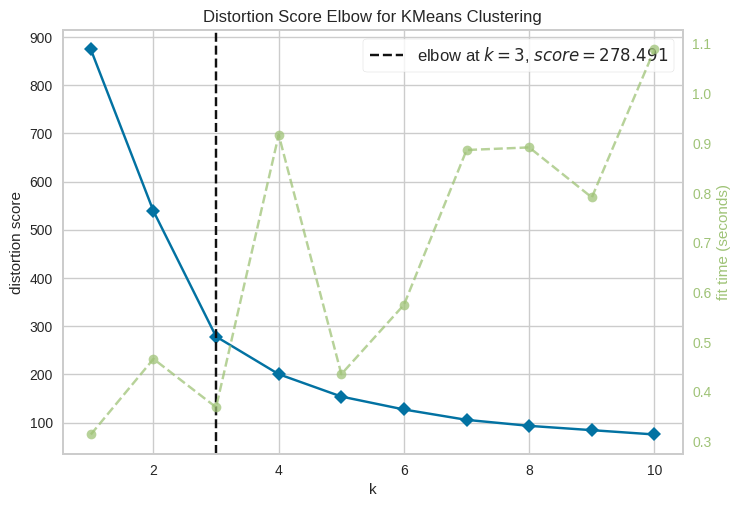

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')
r = range(1,11)
model = KMeans(n_init=10, random_state=42)
Elbow_M = KElbowVisualizer(model, k = r)
Elbow_M.fit(mm_df_kmeans[['recency','frequency','monetary_value']]) # Di bagian ini yg dalam kurung disesuaikan
Elbow_M.show()

Based on above graph, we can conclude the best segment user for QuickU is 4 segment (zero included) and below plot is conduct as alternative method although the result is not as clear as elbow method

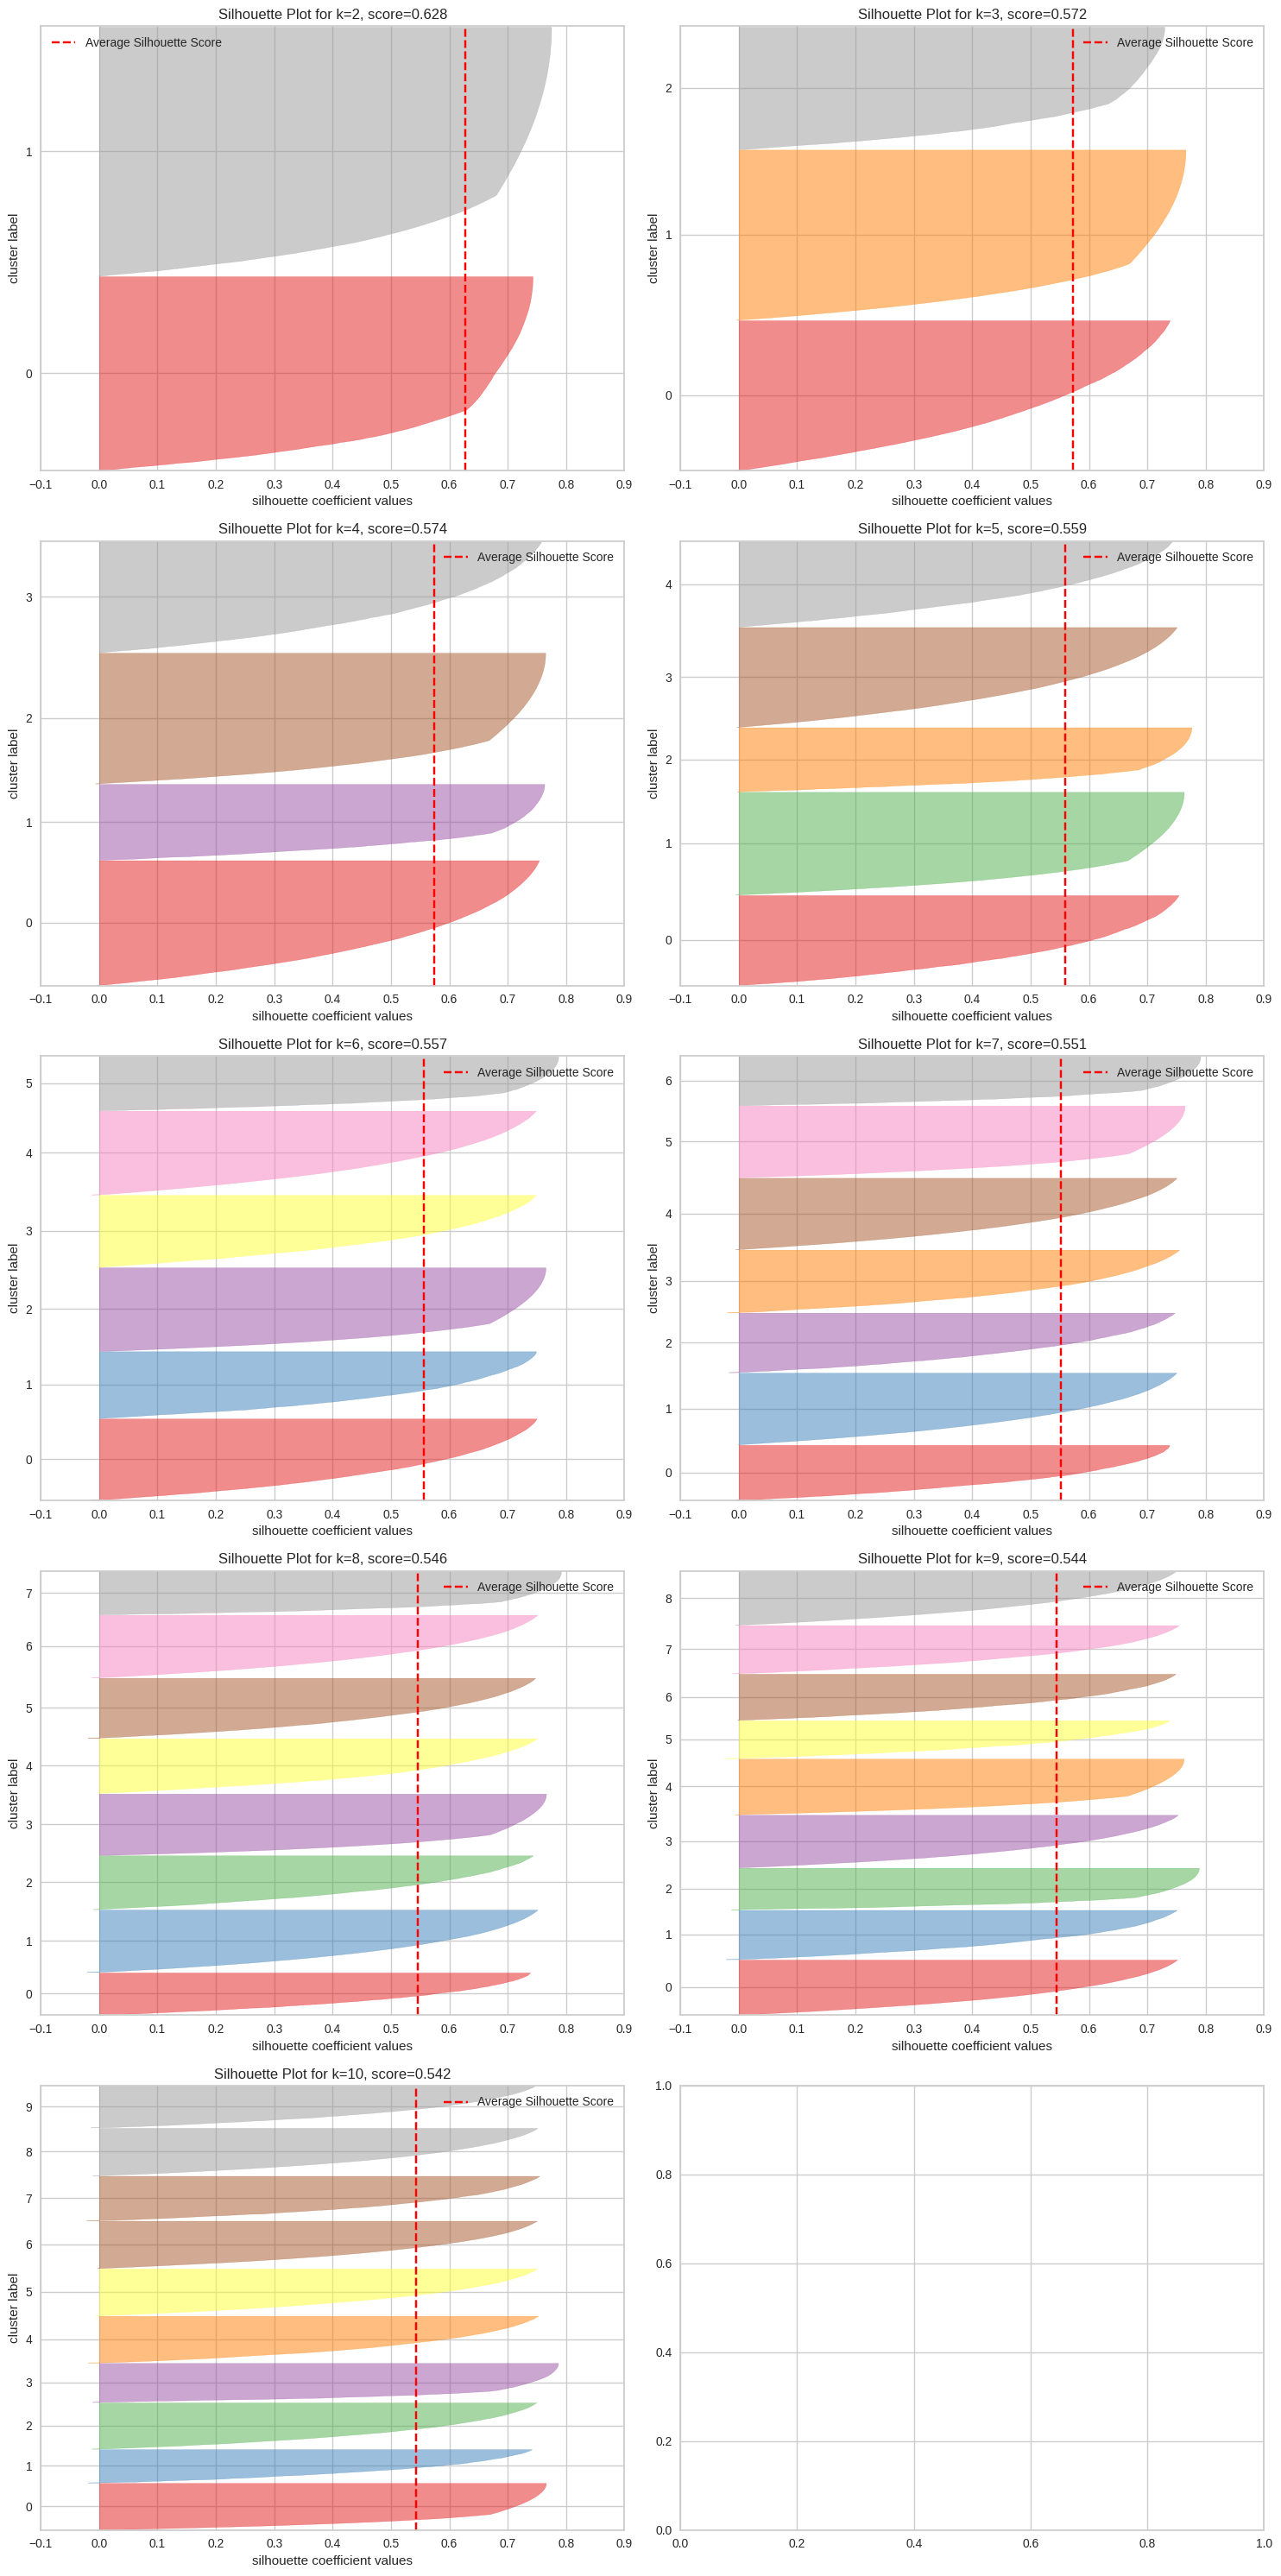

In [ ]:
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = KMeans(n_clusters, n_init=10)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(mm_df_kmeans) # Di bagian ini yg dalam kurung disesuaikan
  sil.finalize()
  # print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")
  ax[q-1][mod].set_title(f'Silhouette Plot for k={n_clusters}, score={sil.silhouette_score_:.3f}')

plt.tight_layout()
plt.show()

In [ ]:
# Divide User Segment into 4 category
cluster_final = mm_df_kmeans.copy()
cluster_model = KMeans(n_clusters = 4, n_init = 10, random_state = 42)
cluster_model.fit_predict(mm_df_kmeans[['recency','frequency','monetary_value']])
cluster_final['cluster'] = cluster_model.labels_
cluster_final

,user_id,recency,frequency,monetary_value,cluster
0,1,0.84,0.09,0.04,3
1,2,0.35,0.09,0.05,2
2,3,0.99,0.09,0.05,3
3,4,0.42,0.09,0.03,2
4,5,0.82,0.27,0.08,3
...,...,...,...,...,...
8689,11084,0.01,0.00,0.02,0
8690,11085,0.01,0.00,0.01,0
8691,11087,0.01,0.00,0.01,0
8692,11093,0.01,0.00,0.02,0


## Result of Segmentation

In [ ]:
df_transfin = cluster_final.merge(df_qutrans, how='right', on='user_id')
df_transfin = df_transfin.drop(columns=['recency_x','frequency_x','monetary_value_x'])
df_transfin.rename(columns = {'recency_y':'recency','monetary_value_y':'monetary','frequency_y':'frequency'}, inplace=True)

df_transfin.head(50)
df_transfin

,user_id,cluster,sessions_id,transactions_id,payment_method_id,total_amount,trans_date,status,recency,frequency,monetary
0,2030,1,33118,6570,1,288000,2020-12-26 10:33:37+00:00,completed,460.00,7,1578000
1,66,1,43057,9115,1,288000,2021-02-13 06:32:34+00:00,completed,309.00,11,2314000
2,7948,1,202309,36448,1,288000,2022-11-20 23:30:38+00:00,completed,3.00,5,1083000
3,3540,1,27850,5599,1,224000,2020-11-18 01:39:36+00:00,completed,129.00,7,1434000
4,1023,1,69759,15127,1,224000,2021-07-29 17:44:36+00:00,completed,22.00,9,1736000
...,...,...,...,...,...,...,...,...,...,...,...
26242,4416,3,41485,8708,5,53500,2021-02-06 15:37:25+00:00,completed,693.00,2,146500
26243,4801,3,49335,10758,5,53500,2021-03-10 14:23:28+00:00,completed,661.00,1,53500
26244,6766,2,93351,18440,5,53500,2021-11-13 08:10:20+00:00,completed,370.00,2,80500
26245,4161,0,152725,30456,5,53500,2022-05-17 08:20:01+00:00,completed,228.00,2,124500


In [ ]:
df_transfin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26247 entries, 0 to 26246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   user_id            26247 non-null  int64              
 1   cluster            26247 non-null  int32              
 2   sessions_id        26247 non-null  int64              
 3   transactions_id    26247 non-null  int64              
 4   payment_method_id  26247 non-null  int64              
 5   total_amount       26247 non-null  int64              
 6   trans_date         26247 non-null  datetime64[ns, UTC]
 7   status             26247 non-null  object             
 8   recency            26247 non-null  float64            
 9   frequency          26247 non-null  int64              
 10  monetary           26247 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int32(1), int64(7), object(1)
memory usage: 2.3+ MB


In [ ]:
check_cluster = df_transfin.groupby(by = ['cluster'], as_index=False).agg({
        'user_id':'nunique',
        'recency': 'mean',
        'frequency': 'mean',
        'monetary': 'mean'
        })
check_cluster

,cluster,user_id,recency,frequency,monetary
0,0,2889,94.90,2.20,"176,539.91"
1,1,1402,233.67,6.64,"1,285,787.99"
2,2,3046,336.34,3.23,"304,261.35"
3,3,1357,740.34,3.32,"318,830.06"


The following is the summaries of RFM indicator of each segment, hence the segment can be labelled as:


*   Cluster 0 -> ***Recent*** user as it has the lowest average day of last purchase (Recency) so that the buying frequency still relatively small. Furthermore, considering the QuickU lifetime still relatively short it's reasonable that almost most of the user is new user.
*   Cluster 1 -> ***At Risk*** user can be categorized as High Spender in QuickU however given the average days of last purchase (Recency) is quite high then this segment will be labeled as At Risk.
*   Cluster 2 -> ***Hibernating*** user can be the result of how high churn rate of QuickU user. It can be visible from how high the Recency number and total complete transaction user as the highest among other cluster.
*   Cluster 3 -> ***Lost*** user almost identical with Hibernating user segment however the difference is how high the Recency number more than 2 times of the Hibernating user. It can be conclude if the Hibernating user left uncontrolled can be fatal.





For more comprehensive explorative data, please refer to full deck of this project here: [QuickU User Segmentation](https://docs.google.com/presentation/d/194wiJ71ht2LoJQAacd5CRugyPlkIDLKpisv0lTWmWjI/edit?usp=sharing)

# Simple Impact Analysis

The method use in this simple impact analysis as follows:
1.   Filter the data transaction with canceled status
2.   Conduct Segmentation using RFM method
3.   Collect each segment and random sampling 8% of total complete transaction
4.   Modify the status into complete transaction



In [ ]:
df_transcanc = df_transinit.copy()
df_transcanc.rename(columns={'transactions_timestamps':'trans_date'}, inplace=True)
df_transcanc = df_transcanc[df_transcanc['status'] == 'canceled']
df_transcanc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11494 entries, 2 to 37738
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sessions_id        11494 non-null  int64 
 1   user_id            11494 non-null  int64 
 2   transactions_id    11494 non-null  int64 
 3   payment_method_id  11494 non-null  int64 
 4   total_amount       11494 non-null  int64 
 5   trans_date         11494 non-null  object
 6   status             11494 non-null  object
dtypes: int64(5), object(2)
memory usage: 718.4+ KB


In [ ]:
df_transcanc.head(10)

,sessions_id,user_id,transactions_id,payment_method_id,total_amount,trans_date,status
2,144311,8697,28750,1,288000,2022-03-27 15:15:17 UTC,canceled
6,131618,4866,25926,1,224000,2022-02-27 18:10:38 UTC,canceled
7,136594,5517,27032,1,224000,2022-03-11 19:14:01 UTC,canceled
8,136624,5815,27039,1,224000,2022-03-11 20:18:49 UTC,canceled
10,165764,5815,32395,1,224000,2022-07-23 13:38:46 UTC,canceled
13,27811,2979,5585,1,160000,2020-11-17 17:37:21 UTC,canceled
14,35275,1269,7076,1,160000,2021-01-07 12:47:02 UTC,canceled
19,56576,5569,12581,1,160000,2021-04-21 17:13:06 UTC,canceled
22,99231,6468,19221,1,160000,2021-12-05 15:31:18 UTC,canceled
23,111673,2456,21332,1,160000,2022-01-15 13:08:15 UTC,canceled


## Date Feature

In [ ]:
NOW2 = dt.datetime(2023, 1, 1, tzinfo=pytz.UTC)

df_transcanc['trans_date'] = pd.to_datetime(df_transcanc['trans_date'])
df_transcanc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11494 entries, 2 to 37738
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   sessions_id        11494 non-null  int64              
 1   user_id            11494 non-null  int64              
 2   transactions_id    11494 non-null  int64              
 3   payment_method_id  11494 non-null  int64              
 4   total_amount       11494 non-null  int64              
 5   trans_date         11494 non-null  datetime64[ns, UTC]
 6   status             11494 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(5), object(1)
memory usage: 718.4+ KB


In [ ]:
df_transcanc['trans_date'].min()

Timestamp('2019-12-21 14:19:29+0000', tz='UTC')

In [ ]:
df_transcanc.shape[0]/df_transcanc['transactions_id'].value_counts().count()

1.0

## RFM Segmentation

In [ ]:
# Assign custom aggregation
custom_agg = {}
custom_agg['trans_date'] = lambda x:x.iloc[0] #Collect first data
custom_agg['transactions_id'] = lambda x:x.iloc[0] #Collect first data
custom_agg['total_amount'] = 'sum'

df_qurfmc = df_transcanc.groupby(['user_id','sessions_id']).agg(custom_agg)

In [ ]:
#Calculate different of recent date with last day of transaction
df_qurfmc['Recency'] = NOW2 - df_qurfmc['trans_date']
df_qurfmc['Recency'] = pd.to_timedelta(df_qurfmc['Recency']).astype('timedelta64[D]')
df_qurfmc.reset_index(inplace=True)

df_qurfmc.head(5)

,user_id,sessions_id,trans_date,transactions_id,total_amount,Recency
0,1,58059,2021-05-06 17:07:54+00:00,12928,96500,604.00
1,1,158208,2022-06-24 17:36:04+00:00,31473,33000,190.00
2,2,121670,2022-02-07 05:42:44+00:00,23686,66000,327.00
3,3,5053,2020-04-15 03:36:04+00:00,958,102000,990.00
4,3,208023,2022-12-11 06:24:56+00:00,37070,181500,20.00


In [ ]:
# Assign custom aggregation
custom_agg = {}
custom_agg["Recency"] = ["min"]
custom_agg["trans_date"] = lambda x: len(x)
custom_agg["total_amount"] = "sum"

df_qurfmfinc = df_qurfmc.groupby('user_id').agg(custom_agg)
df_qurfmfinc.head(5)

,Recency,trans_date,total_amount
,min,<lambda>,sum
user_id,,,
1,190.00,2,129500
2,327.00,1,66000
3,20.00,2,283500
4,125.00,1,93000
5,27.00,7,912000


In [ ]:
df_qurfmfinc.columns = ["recency", "frequency", "monetary_value"]
df_qurfmfinc.reset_index(inplace=True)

df_qurfmfinc.head(5)

,user_id,recency,frequency,monetary_value
0,1,190.00,2,129500
1,2,327.00,1,66000
2,3,20.00,2,283500
3,4,125.00,1,93000
4,5,27.00,7,912000


In [ ]:
df_qutransc = df_transcanc.merge(df_qurfmfinc, how='left', on='user_id')
df_qutransc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11494 entries, 0 to 11493
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   sessions_id        11494 non-null  int64              
 1   user_id            11494 non-null  int64              
 2   transactions_id    11494 non-null  int64              
 3   payment_method_id  11494 non-null  int64              
 4   total_amount       11494 non-null  int64              
 5   trans_date         11494 non-null  datetime64[ns, UTC]
 6   status             11494 non-null  object             
 7   recency            11494 non-null  float64            
 8   frequency          11494 non-null  int64              
 9   monetary_value     11494 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(7), object(1)
memory usage: 987.8+ KB


In [ ]:
# using Minmax Scaler
mm_df_kmeansc = df_kmeansc.copy()
mm_df_kmeansc[['recency', 'frequency', 'monetary_value']] = MinMaxScaler().fit_transform(mm_df_kmeansc[['recency', 'frequency', 'monetary_value']])

Elbow Method to determine the number of clusters to be formed:


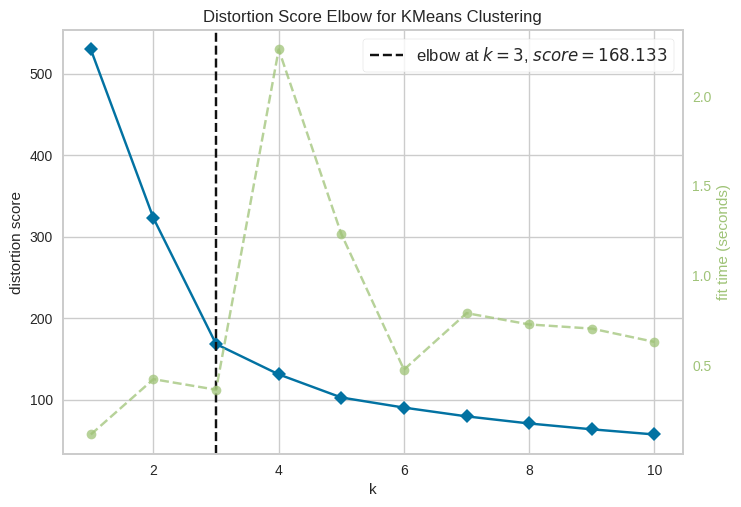

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')
r = range(1,11)
model = KMeans(n_init=10, random_state=42)
Elbow_M = KElbowVisualizer(model, k = r)
Elbow_M.fit(mm_df_kmeansc[['recency','frequency','monetary_value']])
Elbow_M.show()

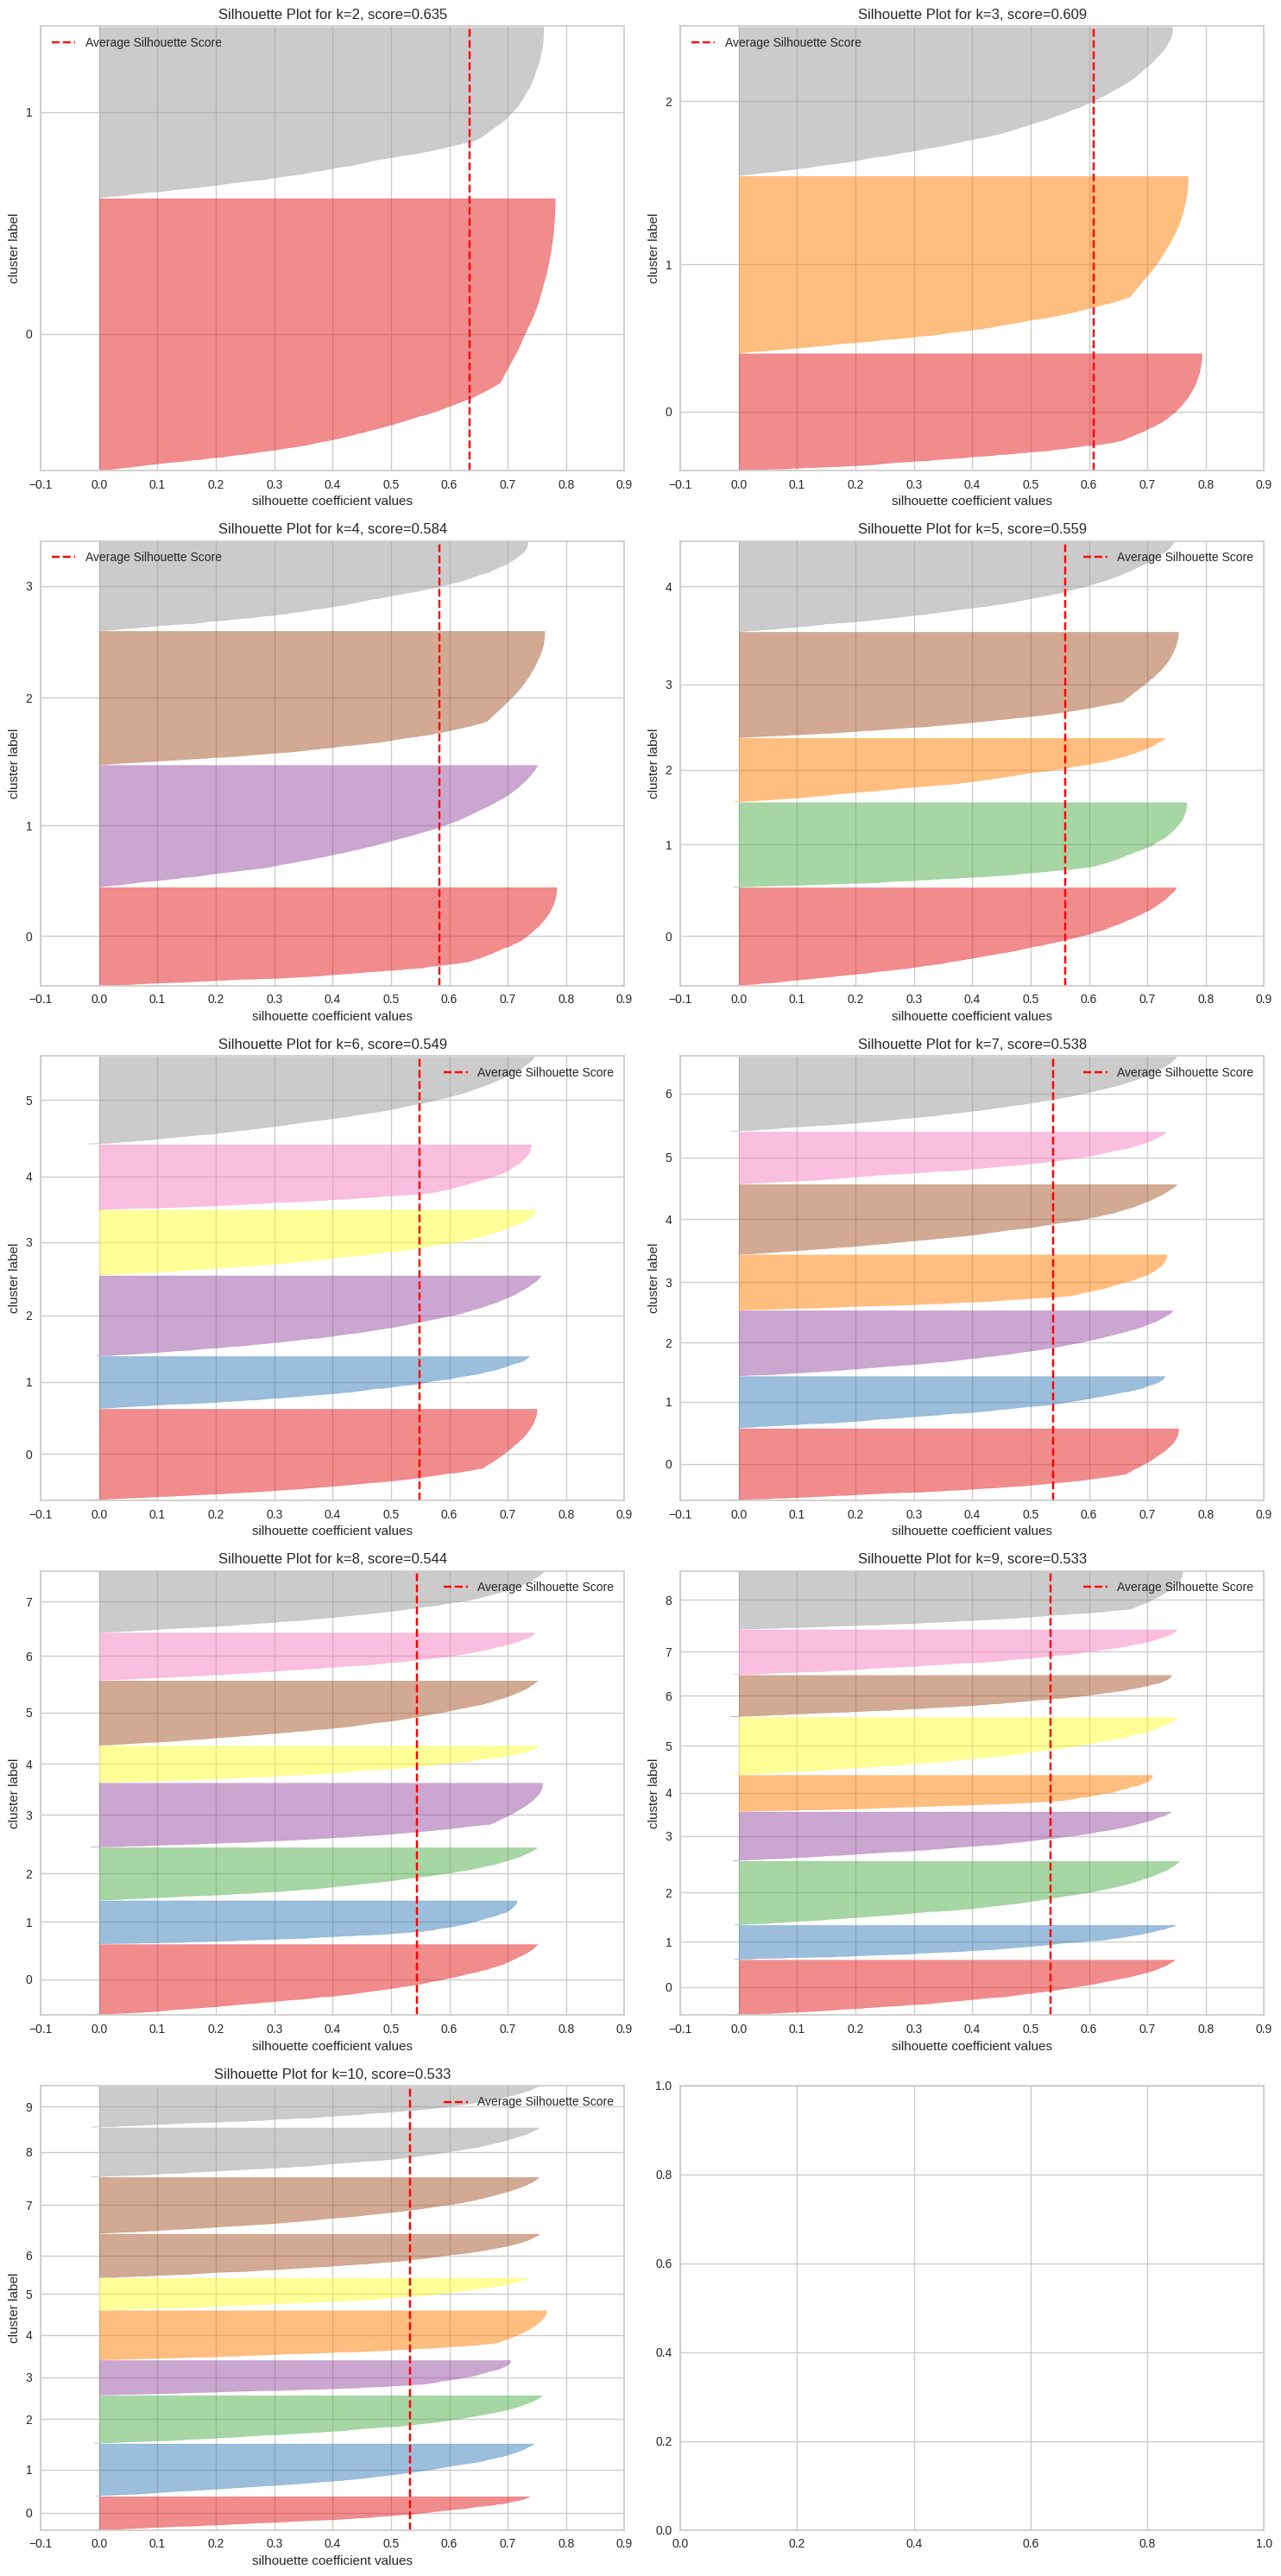

In [ ]:
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = KMeans(n_clusters, n_init=10)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(mm_df_kmeansc)
  sil.finalize()
  # print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")
  ax[q-1][mod].set_title(f'Silhouette Plot for k={n_clusters}, score={sil.silhouette_score_:.3f}')

plt.tight_layout()
plt.show()

In [ ]:
# Divide User Segment into 4 category
cluster_finalc = mm_df_kmeansc.copy()
cluster_modelc = KMeans(n_clusters = 4, n_init = 10, random_state = 42)
cluster_modelc.fit_predict(mm_df_kmeansc[['recency','frequency','monetary_value']])
cluster_finalc['cluster'] = cluster_modelc.labels_
cluster_finalc

,user_id,recency,frequency,monetary_value,cluster
0,1,0.17,0.12,0.07,0
1,2,0.30,0.00,0.04,2
2,3,0.02,0.12,0.16,0
3,4,0.11,0.00,0.05,0
4,5,0.02,0.75,0.51,1
...,...,...,...,...,...
5848,11082,0.01,0.00,0.09,0
5849,11089,0.01,0.00,0.04,0
5850,11090,0.00,0.00,0.04,0
5851,11091,0.01,0.00,0.11,0


### Result of Segmentation

In [ ]:
df_transfinc = cluster_finalc.merge(df_qutransc, how='right', on='user_id')
df_transfinc = df_transfinc.drop(columns=['recency_x','frequency_x','monetary_value_x'])
df_transfinc['trans_date'] = pd.to_datetime(df_transfinc['trans_date']).dt.strftime('%Y-%m-%d').astype('datetime64[ns]')
df_transfinc.rename(columns = {'recency_y':'recency','monetary_value_y':'monetary','frequency_y':'frequency'}, inplace=True)

df_transfinc.head(50)
df_transfinc

,user_id,cluster,sessions_id,transactions_id,payment_method_id,total_amount,trans_date,status,recency,frequency,monetary
0,8697,1,144311,28750,1,288000,2022-03-27,canceled,234.00,3,532000
1,4866,2,131618,25926,1,224000,2022-02-27,canceled,307.00,1,224000
2,5517,1,136594,27032,1,224000,2022-03-11,canceled,84.00,5,1077000
3,5815,1,136624,27039,1,224000,2022-03-11,canceled,161.00,5,1004000
4,5815,1,165764,32395,1,224000,2022-07-23,canceled,161.00,5,1004000
...,...,...,...,...,...,...,...,...,...,...,...
11489,5734,0,203041,36537,5,43000,2022-11-24,canceled,37.00,1,43000
11490,260,3,1687,298,5,117500,2020-02-23,canceled,"1,042.00",1,117500
11491,864,0,129078,25335,5,117500,2022-02-22,canceled,181.00,3,417500
11492,1299,3,39433,8141,5,53500,2021-01-28,canceled,657.00,2,95500


In [ ]:
check_cluster = df_transfinc.groupby('cluster').mean()[['recency','frequency','monetary']].reset_index()
check_cluster

<ipython-input-170-4b06a3d457fa>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,cluster,recency,frequency,monetary
0,0,106.61,1.71,"203,949.48"
1,1,212.38,4.61,"802,285.83"
2,2,330.57,1.91,"202,963.04"
3,3,710.91,1.68,"216,318.15"


Based on the summaries of canceled user segmentation, it can be concluded that the result have realtive similar characteristic with completed user segmentation.

### Cluster 0 - ***Recent*** user

In [ ]:
# Cluster Recent
df_clus022 = df_transfinc.copy()

#Filter only selected period
df_clus022 = df_clus022.loc[(df_clus022['trans_date'] <= '2022-06-30') & (df_clus022['trans_date'] >= '2022-01-01')]

# Collect only Cluster 0
df_clus022 = df_clus022[df_clus022['cluster'] == 0]
df_clus022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 694 entries, 27 to 11491
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            694 non-null    int64         
 1   cluster            694 non-null    int32         
 2   sessions_id        694 non-null    int64         
 3   transactions_id    694 non-null    int64         
 4   payment_method_id  694 non-null    int64         
 5   total_amount       694 non-null    int64         
 6   trans_date         694 non-null    datetime64[ns]
 7   status             694 non-null    object        
 8   recency            694 non-null    float64       
 9   frequency          694 non-null    int64         
 10  monetary           694 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(7), object(1)
memory usage: 62.4+ KB


In [ ]:
# Select 8% of 4,175 orders, 337 orders random with 'cancelled' status
df_clus022s = df_clus022[(df_clus022['status'] == 'canceled')].sample(n=337).index

print("Number of selected rows to change:", len(df_clus022s))
print("Indices of selected rows:", df_clus022s)

# Update status to 'completed' for selected rows
df_clus022.loc[df_clus022s, 'status'] = 'completed'
df_clus022 = df_clus022[df_clus022['status'] == 'completed']

Number of selected rows to change: 337
Indices of selected rows: Int64Index([ 4741, 10041, 10327,  6746,  3347,  4072,  1516,   666,  6687,   578,
            ...
             3643,  8957,  9638,  6554, 10971,  5515,  2937,  5026,  7794,  4882], dtype='int64', length=337)


In [ ]:
df_clus022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 27 to 11491
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            337 non-null    int64         
 1   cluster            337 non-null    int32         
 2   sessions_id        337 non-null    int64         
 3   transactions_id    337 non-null    int64         
 4   payment_method_id  337 non-null    int64         
 5   total_amount       337 non-null    int64         
 6   trans_date         337 non-null    datetime64[ns]
 7   status             337 non-null    object        
 8   recency            337 non-null    float64       
 9   frequency          337 non-null    int64         
 10  monetary           337 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(7), object(1)
memory usage: 30.3+ KB


In [ ]:
dfclus022a = df_transfin.copy()

# Collect only Cluster 0
dfclus022a = dfclus022a[dfclus022a['cluster'] == 0]
dfclus022a['trans_date'] = pd.to_datetime(dfclus022a['trans_date']).dt.strftime('%Y-%m-%d').astype('datetime64[ns]')

# Concatenate (unite) the two DataFrames
dfclus022m = pd.concat([df_clus022, dfclus022a], ignore_index=True)
dfclus022m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5424 entries, 0 to 5423
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            5424 non-null   int64         
 1   cluster            5424 non-null   int32         
 2   sessions_id        5424 non-null   int64         
 3   transactions_id    5424 non-null   int64         
 4   payment_method_id  5424 non-null   int64         
 5   total_amount       5424 non-null   int64         
 6   trans_date         5424 non-null   datetime64[ns]
 7   status             5424 non-null   object        
 8   recency            5424 non-null   float64       
 9   frequency          5424 non-null   int64         
 10  monetary           5424 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(7), object(1)
memory usage: 445.1+ KB


### Cluster 1 - ***At Risk ***user

In [ ]:
# Cluster At Risk
df_clus122 = df_transfinc.copy()

#Filter only selected period
df_clus122 = df_clus122.loc[(df_clus122['trans_date'] <= '2022-06-30') & (df_clus122['trans_date'] >= '2022-01-01')]
df_clus122 = df_clus122[df_clus122['cluster'] == 1]
df_clus122.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 11450
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            1987 non-null   int64         
 1   cluster            1987 non-null   int32         
 2   sessions_id        1987 non-null   int64         
 3   transactions_id    1987 non-null   int64         
 4   payment_method_id  1987 non-null   int64         
 5   total_amount       1987 non-null   int64         
 6   trans_date         1987 non-null   datetime64[ns]
 7   status             1987 non-null   object        
 8   recency            1987 non-null   float64       
 9   frequency          1987 non-null   int64         
 10  monetary           1987 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(7), object(1)
memory usage: 178.5+ KB


In [ ]:
# Select 8% of 3,156 orders, 253 orders random with 'cancelled' status
df_clus122s = df_clus122[(df_clus122['status'] == 'canceled')].sample(n=253).index

print("Number of selected rows to change:", len(df_clus122s))
print("Indices of selected rows:", df_clus122s)

# Update status to 'completed' for selected rows
df_clus122.loc[df_clus122s, 'status'] = 'completed'
df_clus122 = df_clus122[df_clus122['status'] == 'completed']
df_clus122.info()

Number of selected rows to change: 253
Indices of selected rows: Int64Index([ 7343,  1964,  5969,  2084,  3335,  2264,  2263,  3246,  7786,  7280,
            ...
             6572, 10769,  3392,  1256,  2281,  4134,     2, 10302,  2370,   446], dtype='int64', length=253)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 253 entries, 2 to 11437
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            253 non-null    int64         
 1   cluster            253 non-null    int32         
 2   sessions_id        253 non-null    int64         
 3   transactions_id    253 non-null    int64         
 4   payment_method_id  253 non-null    int64         
 5   total_amount       253 non-null    int64         
 6   trans_date         253 non-null    datetime64[ns]
 7   status             253 non-null    object        
 8   recency            253 non-null    float64       
 9   frequency 

In [ ]:
dfclus122a = df_transfin.copy()

dfclus122a = dfclus122a[dfclus122a['cluster'] == 1]
dfclus122a['trans_date'] = pd.to_datetime(dfclus122a['trans_date']).dt.strftime('%Y-%m-%d').astype('datetime64[ns]')

# Concatenate (unite) the two DataFrames
dfclus122m = pd.concat([df_clus122, dfclus122a], ignore_index=True)
dfclus122m.head(5)

,user_id,cluster,sessions_id,transactions_id,payment_method_id,total_amount,trans_date,status,recency,frequency,monetary
0,5517,1,136594,27032,1,224000,2022-03-11,completed,84.00,5,1077000
1,6652,1,151369,30186,1,256000,2022-05-08,completed,69.00,3,500000
2,6821,1,118356,22912,1,213000,2022-01-31,completed,252.00,4,604000
3,5109,1,107250,20335,1,149000,2022-01-04,completed,22.00,5,977000
4,6350,1,119327,23158,1,212000,2022-02-02,completed,301.00,5,1053000


In [ ]:
#dfclus122m.to_csv('df_clus122.csv')

### Cluster 2 - ***Hibernating*** user

In [ ]:
# Cluster Hibernating
df_clus222 = df_transfinc.copy()
df_clus222 = df_transfinc.loc[(df_transfinc['trans_date'] <= '2022-06-30') & (df_transfinc['trans_date'] >= '2022-01-01')]
df_clus222 = df_transfinc[df_transfinc['cluster'] == 2]
df_clus222

,user_id,cluster,sessions_id,transactions_id,payment_method_id,total_amount,trans_date,status,recency,frequency,monetary
1,4866,2,131618,25926,1,224000,2022-02-27,canceled,307.00,1,224000
9,2456,2,111673,21332,1,160000,2022-01-15,canceled,350.00,1,160000
10,3565,2,115999,22331,1,160000,2022-01-25,canceled,340.00,2,373000
13,480,2,45004,9615,1,96000,2021-02-20,canceled,476.00,3,370000
14,1371,2,63582,14231,1,96000,2021-06-28,canceled,278.00,3,359000
...,...,...,...,...,...,...,...,...,...,...,...
11481,5966,2,130521,25651,5,107000,2022-02-26,canceled,294.00,3,264000
11486,1280,2,48861,10632,5,43000,2021-03-07,canceled,325.00,3,137000
11487,8727,2,125300,24502,5,43000,2022-02-14,canceled,282.00,2,149000
11488,4016,2,136192,26945,5,43000,2022-03-10,canceled,296.00,2,78000


In [ ]:
# Select 8% of 3,390 orders, 271 orders random with 'cancelled' status
df_clus222s = df_clus222[(df_clus222['status'] == 'canceled')].sample(n=271).index

print("Number of selected rows to change:", len(df_clus222s))
print("Indices of selected rows:", df_clus222s)

# Update status to 'completed' for selected rows
df_clus222.loc[df_clus222s, 'status'] = 'completed'
df_clus222 = df_clus222[df_clus222['status'] == 'completed']
df_clus222.info()

Number of selected rows to change: 271
Indices of selected rows: Int64Index([ 9199,  4368,  7123,  5741,  4569, 10138, 10189,  8833,  7328,  8093,
            ...
            10440,  4805, 10399,  8146,  1865,  1043,  3942, 10612, 10241,  4492], dtype='int64', length=271)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 271 entries, 134 to 11488
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            271 non-null    int64         
 1   cluster            271 non-null    int32         
 2   sessions_id        271 non-null    int64         
 3   transactions_id    271 non-null    int64         
 4   payment_method_id  271 non-null    int64         
 5   total_amount       271 non-null    int64         
 6   trans_date         271 non-null    datetime64[ns]
 7   status             271 non-null    object        
 8   recency            271 non-null    float64       
 9   frequenc

In [ ]:
dfclus222a = df_transfin.copy()

dfclus222a = dfclus222a[dfclus222a['cluster'] == 2]
dfclus222a['trans_date'] = pd.to_datetime(dfclus222a['trans_date']).dt.strftime('%Y-%m-%d').astype('datetime64[ns]')

# Concatenate (unite) the two DataFrames
dfclus222m = pd.concat([df_clus222, dfclus222a], ignore_index=True)
dfclus222m.head(5)

,user_id,cluster,sessions_id,transactions_id,payment_method_id,total_amount,trans_date,status,recency,frequency,monetary
0,1852,2,48972,10660,1,63000,2021-03-08,completed,508.00,2,131000
1,2357,2,130966,25770,1,9000,2022-02-27,completed,307.00,1,9000
2,1264,2,136080,26919,1,240000,2022-03-10,completed,296.00,2,432000
3,8760,2,141385,28115,1,175000,2022-03-21,completed,285.00,3,444000
4,6076,2,135177,26726,1,67000,2022-03-07,completed,299.00,3,462000


Conclusion:

Based on the analysis performed, it can be concluded that QuickU users are divided into 4 user segmentations which consists of Recent, At Risk, Hibernating and Lost.

Notable characteristics of each segment are visible where the Recent user segment has the smallest average last purchase day to less than 100 days so the purchase frequency is still relatively small. In contrast, At Risk has the highest purchase frequency and the average money spent is up to 303% higher than the second position. However, Hibernating has the highest total user transactions of up to around 3,000 users and a Lost user segment where no more transactions have occurred during 2022.

Then, judging from the results of simple impact analysis, it is highly recommended to focus first on the Recent user segment because the plausible results are more promising than other user segments. Marketing campaigns that can be implemented such as first time user exclusive promos, bundling deals and/or loyalty programs.

[Full Deck Here!](https://docs.google.com/presentation/d/194wiJ71ht2LoJQAacd5CRugyPlkIDLKpisv0lTWmWjI/edit?usp=sharing)